In [1]:
import mibitrans as mbt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ft = 3.281 # factor to convert ft to m

In [4]:
hydro = mbt.HydrologicalParameters(
    velocity=113.8/ft/365,   # Groundwater flow velocity, in [m/day]
    porosity=0.25,           # Effective soil porosity [-]
    alpha_x=13.3/ft,         # Longitudinal dispersivity, in [m]
    alpha_y=1.3/ft,          # Transverse horizontal dispersivity, in [m]
    alpha_z=0                # Transverse vertical dispersivity, in [m]
)

att = mbt.AttenuationParameters(
    # Soil bulk density in [g/m^3]
    bulk_density=1.7,
    # Partition coefficient of the transported contaminant to soil organic matter, in [m^3/g]
    partition_coefficient=38,
    # Fraction of organic material in the soil [-]
    fraction_organic_carbon=5.7e-5,
    # Molecular diffusion, in [m2/day]
    diffusion=0,
    # Contaminant half life, in [days]
    half_life=54.75,
    # Electron acceptor concentrations input as dictionary
    electron_acceptors={
        # Difference between background oxygen and current oxygen concentration in groundwater, in [g/m^3]
        "delta_oxygen":1.65,
        # Difference between background nitrate and current nitrate concentration in groundwater, in [g/m^3]
        "delta_nitrate":0.7,
        # Current ferrous iron concentration in groundwater, in [g/m^3]
        "ferrous_iron":16.6,
        # Difference between background sulfate and current sulfate concentration in groundwater, in [g/m^3]
        "delta_sulfate":22.4,
        # Current methane concentration in groundwater, in [g/m^3]
        "methane":6.6,
    }
)

# Alternatively, specify a source mass to allow for source decay
source = mbt.SourceParameters(
    source_zone_boundary=np.array([7/ft, 37/ft, 65/ft]),
    source_zone_concentration=np.array([13.68, 2.508, 0.057]),
    depth=10/ft,
    total_mass=2000000
)

model = mbt.ModelParameters(
    # Model extent in the longitudinal (x) direction in [m].
    model_length = 320/ft,
    # Model extent in the transverse horizontal (y) direction in [m].
    model_width = 100/ft,
    # Model duration in [days].
    model_time = 6 * 365,
    # Model grid discretization step size in the longitudinal (x) direction, in [m].
    dx = 1/ft,
    # Model grid discretization step size in the transverse horizontal (y) direction, in [m].
    dy = 1/ft,
    # Model time discretization step size, in [days]
    dt = 365 / 5
)

C:\Users\4662504\Documents\Projects\mibitrans\mibitrans\transport\model_parent.py:206: UserWarning: Source zone boundary is larger than model width. Model width adjusted to fit entire source zone.
  warnings.warn(


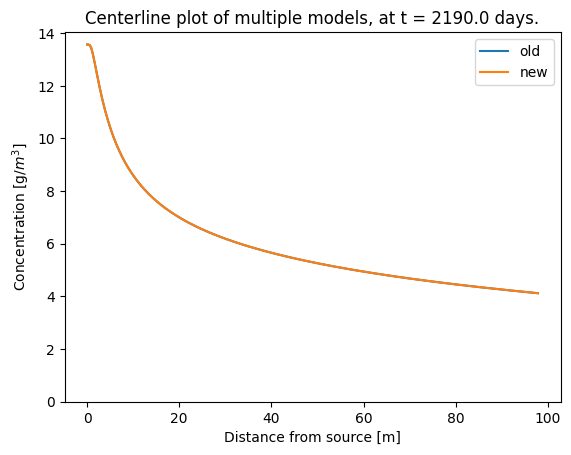

In [5]:
add_old = mbt.domenico.NoDecay(hydro, att, source, model)
add_new = mbt.domenico.NoDecay(hydro, att, source, model)

mbt.centerline([add_old, add_new], legend_names=["old", "new"])
plt.show()